In [2]:
from tqdm.auto import tqdm

a = 0
for i in tqdm(range(1_000_000_000)):
    a += i
    
print(a)

  0%|          | 0/1000000000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
import pandas as pd

data_xy = pd.read_csv(r"/mnt/Data1/Python_Projects/Pure-Python/P5/08-Advanced_Traffic_TA_Class/data/network/SiouxFallsXY.csv", index_col=0)
data_xy


,node,x,y
0,1,50000,510000
1,2,320000,510000
2,3,50000,440000
3,4,130000,440000
4,5,220000,440000
5,6,320000,440000
6,7,420000,380000
7,8,320000,380000
8,9,220000,380000
9,10,220000,320000


In [9]:
data_length = pd.read_csv(r"/mnt/Data1/Python_Projects/Pure-Python/P5/08-Advanced_Traffic_TA_Class/data/network/SiouxFallsNetwork.csv")
data_length

,from,to,length
0,1,2,6000
1,1,3,4000
2,2,1,6000
3,2,6,5000
4,3,1,4000
...,...,...,...
71,23,22,4000
72,23,24,2000
73,24,13,4000
74,24,21,3000


In [10]:
import numpy as np

# Check the XY data structure
print("XY Data:")
print(data_xy.head(10))
print(f"\nShape: {data_xy.shape}")
print(f"Columns: {data_xy.columns.tolist()}")
print(f"Index: {data_xy.index.tolist()}")

XY Data:
   node       x       y
0     1   50000  510000
1     2  320000  510000
2     3   50000  440000
3     4  130000  440000
4     5  220000  440000
5     6  320000  440000
6     7  420000  380000
7     8  320000  380000
8     9  220000  380000
9    10  220000  320000

Shape: (24, 3)
Columns: ['node', 'x', 'y']
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [11]:
# Create a node-to-coordinates mapping
node_coords = data_xy.set_index('node')[['x', 'y']].to_dict('index')

# Calculate Euclidean distance for each edge and compare with given length
results = []
for _, row in data_length.iterrows():
    from_node = row['from']
    to_node = row['to']
    given_length = row['length']
    
    # Get coordinates
    x1, y1 = node_coords[from_node]['x'], node_coords[from_node]['y']
    x2, y2 = node_coords[to_node]['x'], node_coords[to_node]['y']
    
    # Calculate Euclidean distance
    euclidean_dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    # Calculate ratio
    ratio = euclidean_dist / given_length if given_length > 0 else np.nan
    
    results.append({
        'from': from_node,
        'to': to_node,
        'given_length': given_length,
        'euclidean_dist': euclidean_dist,
        'ratio': ratio
    })

results_df = pd.DataFrame(results)
print("Comparison of given lengths vs Euclidean distances:\n")
print(results_df.head(20))
print(f"\n--- Statistics for ratio (euclidean / given_length) ---")
print(f"Mean ratio: {results_df['ratio'].mean():.4f}")
print(f"Std ratio:  {results_df['ratio'].std():.4f}")
print(f"Min ratio:  {results_df['ratio'].min():.4f}")
print(f"Max ratio:  {results_df['ratio'].max():.4f}")
print(f"\nUnique ratios (rounded to 2 decimals): {sorted(results_df['ratio'].round(2).unique())}")

Comparison of given lengths vs Euclidean distances:

    from  to  given_length  euclidean_dist      ratio
0      1   2          6000        270000.0  45.000000
1      1   3          4000         70000.0  17.500000
2      2   1          6000        270000.0  45.000000
3      2   6          5000         70000.0  14.000000
4      3   1          4000         70000.0  17.500000
5      3   4          4000         80000.0  20.000000
6      3  12          4000        120000.0  30.000000
7      4   3          4000         80000.0  20.000000
8      4   5          2000         90000.0  45.000000
9      4  11          6000        120000.0  20.000000
10     5   4          2000         90000.0  45.000000
11     5   6          4000        100000.0  25.000000
12     5   9          5000         60000.0  12.000000
13     6   2          5000         70000.0  14.000000
14     6   5          4000        100000.0  25.000000
15     6   8          2000         60000.0  30.000000
16     7   8          3000   

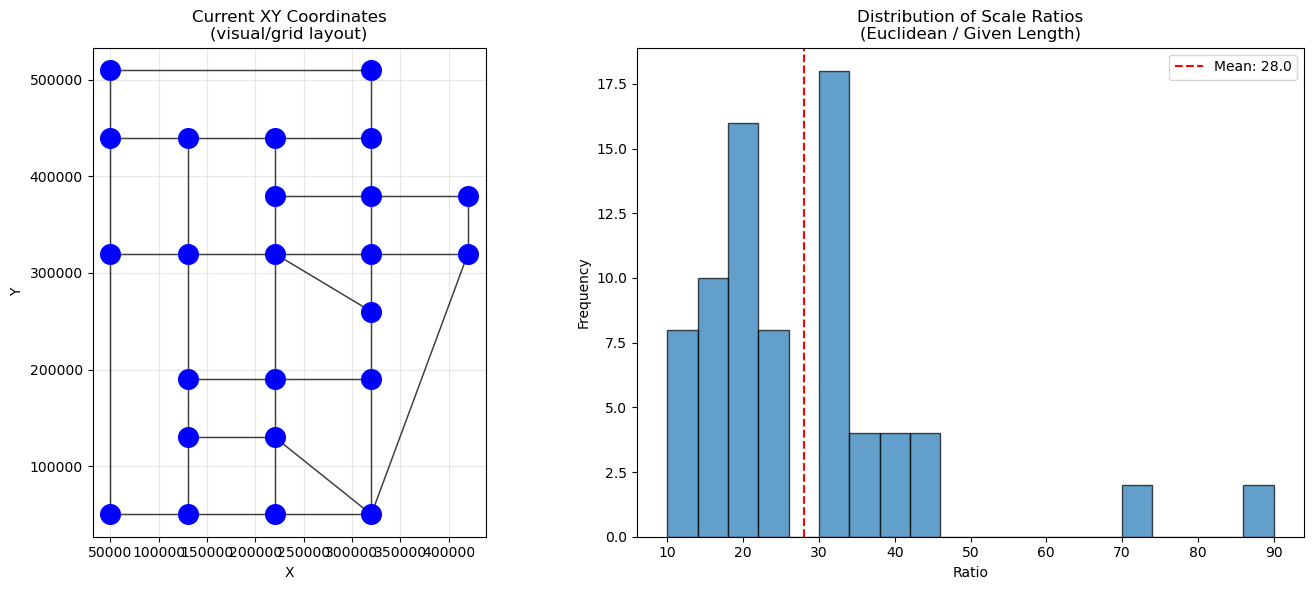


--- Conclusion ---
The XY coordinates appear to be for VISUAL/GRID layout, not geographic accuracy.
Ratios vary from 10 to 90, so simple uniform scaling is NOT possible.


In [12]:
import matplotlib.pyplot as plt

# Visualize the network with current coordinates
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Current XY positions
ax1 = axes[0]
for _, row in data_xy.iterrows():
    ax1.scatter(row['x'], row['y'], s=200, c='blue', zorder=5)
    ax1.annotate(str(row['node']), (row['x'], row['y']), ha='center', va='center', fontsize=8, color='white', fontweight='bold')

# Draw edges
for _, row in data_length.drop_duplicates(subset=['from', 'to']).iterrows():
    from_node, to_node = row['from'], row['to']
    x1, y1 = node_coords[from_node]['x'], node_coords[from_node]['y']
    x2, y2 = node_coords[to_node]['x'], node_coords[to_node]['y']
    ax1.plot([x1, x2], [y1, y2], 'k-', alpha=0.5, linewidth=1)

ax1.set_title('Current XY Coordinates\n(visual/grid layout)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram of ratios
ax2 = axes[1]
ax2.hist(results_df['ratio'], bins=20, edgecolor='black', alpha=0.7)
ax2.axvline(results_df['ratio'].mean(), color='red', linestyle='--', label=f'Mean: {results_df["ratio"].mean():.1f}')
ax2.set_title('Distribution of Scale Ratios\n(Euclidean / Given Length)')
ax2.set_xlabel('Ratio')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n--- Conclusion ---")
print("The XY coordinates appear to be for VISUAL/GRID layout, not geographic accuracy.")
print("Ratios vary from 10 to 90, so simple uniform scaling is NOT possible.")